### 네이버 얼굴 인식(CFR)

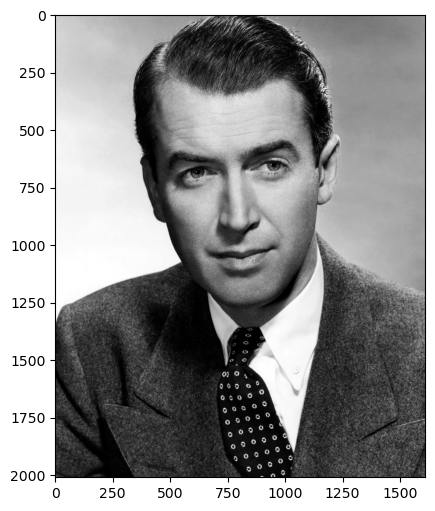

{"info":{"size":{"width":1609,"height":2010},"faceCount":1},"faces":[{"celebrity":{"value":"황찬빈","confidence":0.01}}]}


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("./datas/face_detection1.jpg") 
plt.figure(figsize=(8,6))  # 화면 크기
plt.imshow(img)
plt.show()


import requests
client_id = "awCjNktK3KpRQQG2p_dq"
client_secret = "b1fgFv9gZd"
# url = "https://openapi.naver.com/v1/vision/face" 
url = "https://openapi.naver.com/v1/vision/celebrity" 
files = {'image': open('./datas/face_detection1.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url,  files=files, headers=headers)
print(response.text)


In [13]:
import requests
import json
client_id = "awCjNktK3KpRQQG2p_dq"
client_secret = "b1fgFv9gZd"
# url = "https://openapi.naver.com/v1/vision/face" 
url = "https://openapi.naver.com/v1/vision/celebrity" 
files = {'image': open('./datas/face_detection1.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url,  files=files, headers=headers)
# print(response.text)
# print(type(response.text))  # str(문자열)

parsed = json.loads(response.text)
# print(parsed)
print(type(parsed))  # 파이썬 딕셔너리


# 딕셔너리를 json.dumps() 처리하면 json 데이터로 저장함
# confidence는 일치함
# print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

<class 'dict'>


In [14]:
import requests
import json
client_id = "awCjNktK3KpRQQG2p_dq"
client_secret = "b1fgFv9gZd"
# url = "https://openapi.naver.com/v1/vision/face" 
url = "https://openapi.naver.com/v1/vision/face"  # 마지막 경로 - face
files = {'image': open('./datas/face_detection1.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url,  files=files, headers=headers)

detect_result = json.loads(response.text)
detect_result




{'info': {'size': {'width': 1609, 'height': 2010}, 'faceCount': 1},
 'faces': [{'roi': {'x': 462, 'y': 502, 'width': 678, 'height': 678},
   'landmark': {'leftEye': {'x': 615, 'y': 679},
    'rightEye': {'x': 920, 'y': 637},
    'nose': {'x': 782, 'y': 893},
    'leftMouth': {'x': 672, 'y': 1039},
    'rightMouth': {'x': 955, 'y': 1000}},
   'gender': {'value': 'male', 'confidence': 0.999998},
   'age': {'value': '40~44', 'confidence': 0.519075},
   'emotion': {'value': 'neutral', 'confidence': 0.999999},
   'pose': {'value': 'frontal_face', 'confidence': 0.998274}}]}

In [15]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [16]:
detect_result['faces']  # roi : rectangle of information

[{'roi': {'x': 462, 'y': 502, 'width': 678, 'height': 678},
  'landmark': {'leftEye': {'x': 615, 'y': 679},
   'rightEye': {'x': 920, 'y': 637},
   'nose': {'x': 782, 'y': 893},
   'leftMouth': {'x': 672, 'y': 1039},
   'rightMouth': {'x': 955, 'y': 1000}},
  'gender': {'value': 'male', 'confidence': 0.999998},
  'age': {'value': '40~44', 'confidence': 0.519075},
  'emotion': {'value': 'neutral', 'confidence': 0.999999},
  'pose': {'value': 'frontal_face', 'confidence': 0.998274}}]

In [17]:
detect_result['faces'][0]['roi']  # faces 키가 리스트형

{'x': 462, 'y': 502, 'width': 678, 'height': 678}

In [18]:
detect_result['faces'][0]['gender']

{'value': 'male', 'confidence': 0.999998}

In [19]:
detect_result['faces'][0]['emotion']

{'value': 'neutral', 'confidence': 0.999999}

In [20]:
detect_result.values()

dict_values([{'size': {'width': 1609, 'height': 2010}, 'faceCount': 1}, [{'roi': {'x': 462, 'y': 502, 'width': 678, 'height': 678}, 'landmark': {'leftEye': {'x': 615, 'y': 679}, 'rightEye': {'x': 920, 'y': 637}, 'nose': {'x': 782, 'y': 893}, 'leftMouth': {'x': 672, 'y': 1039}, 'rightMouth': {'x': 955, 'y': 1000}}, 'gender': {'value': 'male', 'confidence': 0.999998}, 'age': {'value': '40~44', 'confidence': 0.519075}, 'emotion': {'value': 'neutral', 'confidence': 0.999999}, 'pose': {'value': 'frontal_face', 'confidence': 0.998274}}]])

In [32]:
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = detect_result['faces'][0]['gender'].values()
# print(x, y, w, h)
emotion, emo_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()
# 사진 위에 얼굴 정보 출력
annotation = f"{gender}:{gen_confidence}\n{emotion}:{emo_confidence}\n{age}:{age_confidence}"
print(annotation)

male:0.999998
neutral:0.999999
40~44:0.519075


### 얼굴 인식 정보 출력
### 인식된 얼굴 사진에 박스 넣기

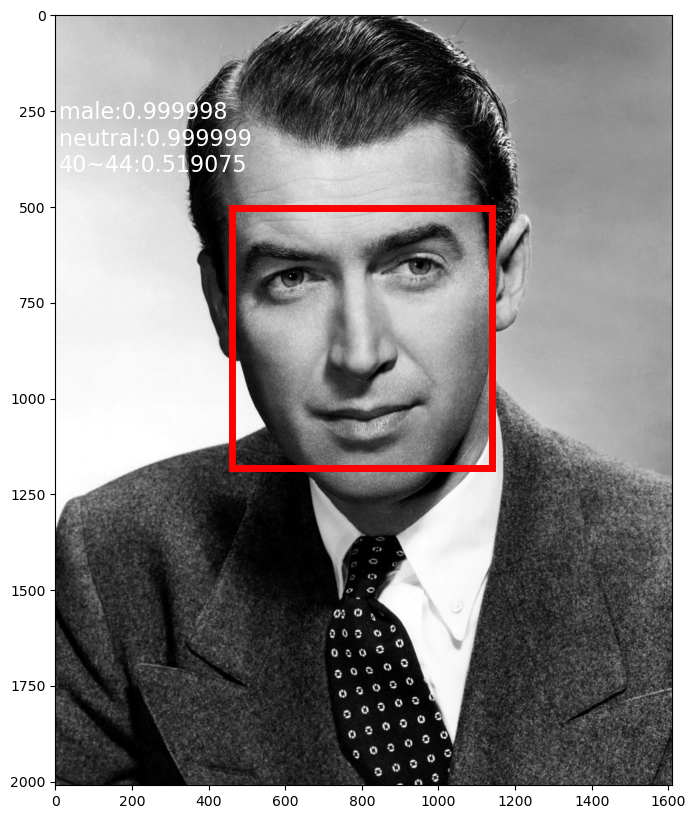

In [38]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

client_id = "awCjNktK3KpRQQG2p_dq"
client_secret = "b1fgFv9gZd"

url = "https://openapi.naver.com/v1/vision/face" 
url = "https://openapi.naver.com/v1/vision/face"  # 마지막 경로 - face
files = {'image': open('./datas/face_detection1.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url,  files=files, headers=headers)

detect_result = json.loads(response.text)
detect_result

detect_result.keys()
detect_result['faces']
detect_result['faces'][0]['roi']

# values()로 값을 받고 그 값을 개수에 맞춰 각 변수에 저장함
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = detect_result['faces'][0]['gender'].values()
# print(x, y, w, h)
emotion, emo_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()
# 사진 위에 얼굴 정보 출력
annotation = f"{gender}:{gen_confidence}\n{emotion}:{emo_confidence}\n{age}:{age_confidence}"
# print(annotation)

img = mpimg.imread("./datas/face_detection1.jpg")
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)


# 얼굴 인식 박스 그리기(linewidth-선 굵기, edgecolor-테두리색, facecolor-채움색)
rect_face  = patches.Rectangle((x,y), w, h,
                               linewidth=5,
                               edgecolor='red',
                               facecolor='none')
ax.add_patch(rect_face)
# plt.text()는 사진에 글자를 입력하는 함수
plt.text(10, 400, annotation, wrap=True, color='white', fontsize='16')
plt.show()